In [9]:
import sys
import os
import math

from tqdm import tqdm
import pandas as pd

from src.tools.google_drive import ensure_data_files


import plotly.express as px

import matplotlib.pyplot as plt


# 현재 파일이 있는 디렉토리 기준으로 상위 폴더 경로 추가
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # 한 단계 상위 폴더
sys.path.append(parent_dir)

print(f"추가된 경로: {parent_dir}")

data_paths = ensure_data_files()


추가된 경로: c:\Users\LEEYS\Desktop\쩝쩝LAB2\yamyam-lab
기존 data가 존재합니다. 파일 경로를 반환합니다.


In [3]:
# Load data into Pandas DataFrames
print(data_paths)
df_review = pd.read_csv(data_paths["review"], index_col=0)
df_diner = pd.read_csv(data_paths["diner"], index_col=0)
df_reviewer  = pd.read_csv(data_paths["reviewer"], index_col=0)
df_category = pd.read_csv(data_paths["category"], index_col=0)

{'diner': 'C:\\Users\\LEEYS\\Desktop\\쩝쩝LAB2\\yamyam-lab\\data\\diner.csv', 'category': 'C:\\Users\\LEEYS\\Desktop\\쩝쩝LAB2\\yamyam-lab\\data\\diner_category_raw.csv', 'review': 'C:\\Users\\LEEYS\\Desktop\\쩝쩝LAB2\\yamyam-lab\\data\\review.csv', 'reviewer': 'C:\\Users\\LEEYS\\Desktop\\쩝쩝LAB2\\yamyam-lab\\data\\reviewer.csv', 'weather': 'C:\\Users\\LEEYS\\Desktop\\쩝쩝LAB2\\yamyam-lab\\data\\weather.csv'}


C:\Users\LEEYS\AppData\Local\Temp\ipykernel_26160\3574656157.py:4: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_diner = pd.read_csv(data_paths["diner"], index_col=0)


In [4]:
df = pd.merge(df_review, df_diner, on='diner_idx', how='left')
df = pd.merge(df, df_reviewer, on='reviewer_id', how='left')
df = pd.merge(df, df_category, on='diner_idx', how='left')

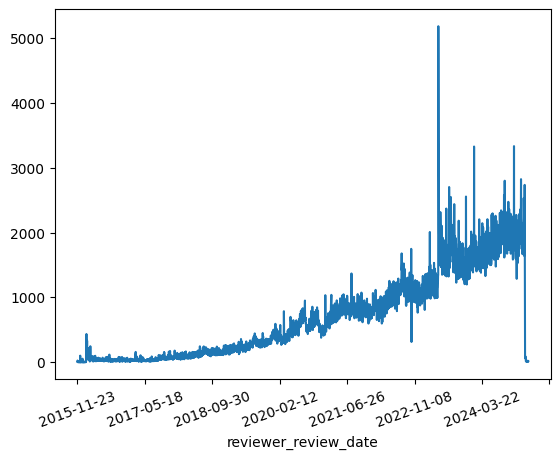

In [5]:
df.reviewer_review_date.value_counts().sort_index().plot()
plt.xticks(rotation=20)
plt.show()

In [6]:
df.reviewer_review_date.value_counts().sort_index().tail(30)

reviewer_review_date
2025-01-30    1889
2025-01-31    1939
2025-02-01    2734
2025-02-02    1742
2025-02-03     493
2025-02-04      96
2025-02-05      64
2025-02-06      59
2025-02-07      75
2025-02-08      88
2025-02-09      50
2025-02-10      15
2025-02-11      16
2025-02-12      23
2025-02-13      27
2025-02-14      10
2025-02-15      16
2025-02-16      24
2025-02-17      11
2025-02-18      18
2025-02-19      15
2025-02-20      16
2025-02-21      22
2025-02-22      17
2025-02-23      19
2025-02-24      10
2025-02-25      19
2025-02-26      23
2025-02-27      15
2025-02-28      14
Name: count, dtype: int64

### 1. 서울시 구별 음식점 평균 평점

In [7]:
df["reviewer_review_date"] = pd.to_datetime(df['reviewer_review_date'])
df['reviewer_review_weekday'] = df['reviewer_review_date'].dt.weekday
df['시도'] = df['diner_road_address'].str.split().str[0]
df['구군'] = df['diner_road_address'].str.split().str[1]

In [13]:
seoul = df[df['시도'] == '서울']

gu_avg = seoul.groupby('구군')['reviewer_review_score'].agg(['mean', 'std', 'median', 'count']).reset_index()
gu_avg.columns = ['구군', '평균평점', '표준편차', '중앙값', '리뷰수']

gu_avg = gu_avg.sort_values('리뷰수', ascending=False)

fig = px.bar(
    gu_avg.sort_values('평균평점', ascending=False),
    x='구군',
    y='평균평점',
    title='서울시 구별 음식점 평균 평점',
    text='평균평점',
    hover_data={
        '평균평점': True,
        '표준편차': True,
        '중앙값': True,
        '리뷰수': True
    }
)

fig.update_layout(height=500, width=900)
fig.show()

In [ ]:
seoul_grouped = seoul_df.groupby(['구군', 'diner_category_large']).agg({'review_id': 'count'}).reset_index()
seoul_grouped.columns = ['구군', '카테고리', '리뷰수']

gu_list = seoul_grouped['구군'].unique()

fig = go.Figure()

for i, gu in enumerate(gu_list):
    df_gu = seoul_grouped[seoul_grouped['구군'] == gu].sort_values('리뷰수', ascending=False)

    fig.add_trace(go.Bar(
        x=df_gu['카테고리'],
        y=df_gu['리뷰수'],
        name=gu,
        visible=(i == 0)
    ))

dropdown_buttons = [
    dict(label=gu,
         method='update',
         args=[{'visible': [i == j for j in range(len(gu_list))]},
               {'title': f"{gu} 음식점 대분류별 리뷰 수"}])
    for i, gu in enumerate(gu_list)
]

fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=1.15,
        y=1.15,
        showactive=True
    )],
    title=f"{gu_list[0]} 음식점 대분류별 리뷰 수",
    xaxis_title="음식점 대분류",
    yaxis_title="리뷰 수",
)

fig.show()


In [ ]:

seoul_df = df[df['시도'] == '서울'] 
grouped = seoul_df.groupby(['구군', 'diner_category_large'])['reviewer_review_score'].mean().reset_index()
grouped.columns = ['구군', '카테고리', '평균평점']

gu_list = grouped['구군'].unique()

fig = go.Figure()

for i, gu in enumerate(gu_list):
    df_gu = grouped[grouped['구군'] == gu].sort_values('평균평점', ascending=False)

    fig.add_trace(go.Bar(
        x=df_gu['카테고리'],
        y=df_gu['평균평점'],
        name=gu,
        visible=(i == 0)
    ))

dropdown_buttons = [
    dict(label=gu,
         method='update',
         args=[{'visible': [i == j for j in range(len(gu_list))]},
               {'title': f"{gu} 음식점 대분류별 평균 평점 (높은 순 정렬)"}])
    for i, gu in enumerate(gu_list)
]

# 6. Layout 정
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=1.15,
        y=1.15,
        showactive=True
    )],
    title=f"{gu_list[0]} 음식점 대분류별 평균 평점 (높은 순 정렬)",
    xaxis_title="음식점 대분류 (평균 평점 기준)",
    yaxis_title="평균 평점",
    yaxis=dict(range=[grouped['평균평점'].min() - 0.1, grouped['평균평점'].max() + 0.1])
)

fig.show()
